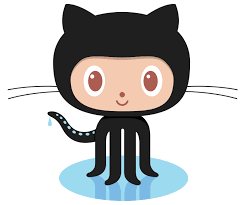

# Git & GitHub

_Author: Alfred Zou_

---

### Git
* Git is a version control system for local repositories, also known as file and folders
* It allows users to make changes to the repositiories, make save points with commits, log changes and restore to previous save points
* Each project starts with the a main branch called the origin
* Users can create branches to test new features, then if they want to, they can merge the changes into the main branch
* Upon merging conflicts must be resolved
* Note Git can be used without GitHub

### GitHub
* GitHub is the online equivalent of Git, or an online repository
* It promotes collaboration by providing a location for code storage, and a platform for issues to be raised
* GitHub also promotes open source, as most users leave their repositories public
* Local repositories can be pushed to GitHub
* Online repositories can be pulled from GitHub
* Other users projects can be forked, which adds an online repository to your GitHub
* Cloning a project, downloads a online repository to your computer (a local repository)
* While one developer works on a main branch, at the same time another developer could create a branch to test a new feature. When this feature is complete it can then be merged with the master branch and any conflicts must be resolved

### GitHub Enterprise
* GitHub Enterprise is the commercial version of GitHub. Companies pay GitHub for their own private versions of GitHub

### Git Commands
* `git init`: turn a local folder into a local repository
* `git status`: checks the status of a local repository. It will let you know what files are not tracked. It will let you know what files have been modified.
* `git log`: provides the history of all commits made for this proejct. Press space to go down a page and q to quit
* `git add file_name`: stage a file, so when you git commit it will be included in the commit
* `git add .`: stages all files in the local repository
* `git restore -S file_name`: unstages a file
* `git commit -m "log_message"`: commit all staged files. The "log_message" will show in git log

### Branches
* Branches let you test out new features without effecting the master (or main) branch
* After we are satified with it, we can merge it back into the master branch
* `git branch`: checks existing branches
* `git branch my_branch`: creates a new branch
* `git checkout my_branch`: switches branches
* to merge the branch into the master branch
* `git checkout master`: navigate to the master branch
* `git merge my_branch`: to merge the branch into the master branch
* `git branch -d my_branch`: delete the branch

### The Git Process:
1. git init: initiliase the folder as a local repository
2. Make edits
3. git add file_name: stage the files
4. git commit -m "log_message": commit the file with the log message "log_message"
5. git push origin master: push it onto GitHub

### Git with GitHub
* To use Git with GitHub, we need to create an online repository on GitHub
* Then we need to tell Git about the location of the online repository
* We can get the URL from GitHub
* `git remote add origin URL`: this tells git to associate origin with the URL
* `git remote set-url origin new_URL`: change the url of a remote connection
* `git remote rm origin`: delete a remote connection
* `git push -u origin master`: this tells git to upload the local repository to GitHub under the branch, master. The -u lets you use `git push` and `git pull` without arguments, telling git to push to the URL at origin and to the branch, Master
* `git push origin my_branch`: this tells git to upload the local repository to GitHub under the branch, my_branch.
* `git pull`: to download GitHub repository to local repository and merge

### Ignoring Files with Git
* `touch .gitignore`: create an ignore file
* `echo "file_name" > .gitignore`: ignore certain file_names. This could be "*.log" for log files, not wild cards can be used
* `git status`: if you run this, you shouldn't see the ignored files now

### Multiple GitHub Accounts using SSH
* Often you'll have a personal and company github account. You need to use SSH keys to ensure your local repository matches up with the online repository of the correct account

### Navigating to SSH folder
* Using `gitbash` or command line interface of your choice:
* `cd ~/.ssh`: to navitage to the ssh folder
* `ls -l`: to list all files in the ssh folder

### Generating SSH Key-Pairs and Linking to Online GitHub Account
* `ssh-keygen -t rsa -C "email@gmail.com" -f "id_rsa_file_name"`: creates a ssh private and public keys. -t is the flag for the algorithm. -c is the comment flag for putting in your email. -f is the file name flag. In this case it will generate two files id_rsa_file_name (private key that stays on your desktop) and id_rsa_file_name.pub (public key that connects with GitHub's online account. Note for each computer, you will need to generate a key-pair for each GitHub account.
* `enter` `enter` when prompted for a password
* `ssh-add id_rsa_file_name`: register each key with the ssh agent. If successful you'll see 'Identity Added'
* `vim id_rsa_file_name.pub`: go into your file and copy the public ssh key
* `:q` to exit vim
* Go to your GitHub account you want to connect to. In the top-right hit settings > SSH and GPG keys > New SSH Key. Then copy in the public ssh key
* Repeat above steps for the number of GitHub accounts you have

### Creating the Config File
* The config file is necessary to help git connect the public ssh key you have provided to each GitHub account and direct it to your private ssh key
* `touch config`: create the config file
* `nano config`: enter the config file and paste in the code block in the file
* The Host is a unique identifier, the HostName is the URL of the github site and the IdnetityFile is the location of the private ssh key

``` bash
Host github.com
        HostName github.com
        User git
        IdentityFile ~/.ssh/id_rsa_personal

Host github-cape
        HostName github.com
        User git
        IdentityFile ~/.ssh/id_rsa_cape

Host github-ga
        HostName git.generalassemb.ly
        User git
        IdentityFile ~/.ssh/id_rsa_GA
```
* `Cntrl + x` `y` `enter`: save the file and exit
* Add a new code block for each GitHub account
* Here is an example where I have connected three accounts

### Testing if it Works or Not - Setup
* `mkdir my_folder`: creates a folder
* `cd my_folder`: navigates into the folder
* `git init`: initialises the folder for git
* `touch README.md`: creates a readme document
* `git add .`: stages the readme document
* `git commit -m 'first commit'`: commits the readme document

### Testing if it Works or Not - Connecting to Online Repository
* Go to your GitHub account and create a New Repository
* `git remote -v`: to see all the online connections. It should be empty
* For the New Repository copy the ssh_address
* `git remote add origin ssh_address`: adds a remote repository called origin connected to the URL of ssh_address
* `git push -u origin master`: pushes to your online repo
* Check your GitHub account, if the repo has been updated

``` bash
$ git remote -v
origin  git@github.com:alfredzou/ssh-test.git (fetch)
origin  git@github.com:alfredzou/ssh-test.git (push)

$ git remote -v
origin  git@git.generalassemb.ly:alfredzou/ssh-test.git (fetch)
origin  git@git.generalassemb.ly:alfredzou/ssh-test.git (push)

$ git remote -v
origin  git@github-cape:capeofstorms/ssh-test.git (fetch)
origin  git@github-cape:capeofstorms/ssh-test.git (push)
```

### Changing User Name and Email
* As we are using different accounts, we probably want to use different emails to differentiate personal and work GitHub Accounts
* `git config user.name`: using this we can check the user name
* `git config user.email`: using this we can check the user email
* `git config user.name new_name`: change user name for this project
* `git config user.email new_email`: change email for this project